<a href="https://colab.research.google.com/github/apatti/apatti_ml/blob/master/AmazonReviewValidator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Generation

In [2]:
!pip install bs4
!pip install requests

In [1]:
import requests
from bs4 import BeautifulSoup
import re
from datetime import datetime


In [143]:
#url = "https://www.amazon.com/BERTER-Compression-Breathable-Basketball-Arthritis/dp/B081V59PJ3/?_encoding=UTF8&pd_rd_w=BNQws&pf_rd_p=033c17c3-57f2-4b85-909f-7e0c0a2b2a10&pf_rd_r=5RBE95ED5E1HJ5386TPJ&pd_rd_r=d583a085-a62b-454c-a095-b4f997896094&pd_rd_wg=80ks4&ref_=pd_gw_pb_recs_pfvs";
review_url = "https://www.amazon.com/BERTER-Knee-Brace-Men-Women/product-reviews/B087G62NTF/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1&filterByStar=all_stars"
#review_url = "https://www.amazon.com/BERTER-Compression-Breathable-Basketball-Arthritis/product-reviews/B081V59PJ3/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [142]:
class ReviewCollector:
  HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/90.0.4430.212 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'});

  def __init__(self):
    self.reviews=[]
  
  def loadReviews(self,url):
    next_url = url
    page=1
    while next_url:
      print("Loading page {0}".format(page))
      self.__getHtmlContent(next_url)
      self.__getCustomerReviews();
      next_url = self.__getNextPageUrl()
      page +=1

    print("Loaded {0} reviews".format(len(self.reviews)))
    return
  
  def __getNextPageUrl(self):
    next_page_tag = self.soup.find('li',class_="a-last")
    if next_page_tag and next_page_tag.find("a"):
      #print(next_page_tag.find("a").get('href'))
      return "https://www.amazon.com"+next_page_tag.find("a").get('href')

    return None

  def __getHtmlContent(self,url):
    r = requests.get(url,headers=ReviewCollector.HEADERS) 
    self.soup = BeautifulSoup(r.text, 'html.parser')
    #print(self.soup)
  
  def __extractStars(self,tag):
    starTag = tag.find('i',{"data-hook","review-star-rating"})
    if starTag:
      return self.__starsToInt(starTag.get("title"))
    else:
      return self.__starsToInt(tag.find('i',class_="review-rating").get_text())

  def __starsToInt(self, starString):
    if not starString:
      return -1

    starsMatch = re.match("([0-9]).0 out of",starString)
    if starsMatch:
      return int(starsMatch.group(1))
    else:
      return -1
    
  def __extractCountryDate(self,reviewDateString):
    match = re.match("Reviewed in (.*) on (.*)",reviewDateString)
    if match:
      return match.group(1),match.group(2) #country, date dateformat: datetime.strptime(match.group(2), '%B %d, %Y')
    else:
      return None,None

  def __extractBody(self,tag):
    bodyTag = tag.find("span",{'data-hook':"review-body"})
    return bodyTag.get_text() if bodyTag else tag.find("span",_class="a-size-base cr-lightbox-review-bod").get_text()

  def __extractTitle(self,tag):
    titleTag = tag.find("a",{"data-hook":"review-title"})
    if titleTag:
      return titleTag.get_text().replace("\n","")
    else:
      return tag.find("span",{"data-hook":"review-title"}).get_text()

  def __getCustomerReviews(self):
    for customer_review in self.soup.find_all("div",class_="a-section celwidget"):
      review = {}
      review['author'] = customer_review.find('span',class_="a-profile-name").get_text()
      review['stars'] = self.__extractStars(customer_review)
      review['verified_purchase'] = True if customer_review.find('span',{"data-hook":"avp-badge"}) else False
      review['title'] = self.__extractTitle(customer_review)
      review['content'] = self.__extractBody(customer_review).strip()
      review['country'],review['dateString'] = self.__extractCountryDate(customer_review.find("span",{"data-hook":"review-date"}).get_text())
      self.reviews.append(review)

    pass


In [144]:
reviewHelper = ReviewCollector()
reviewHelper.loadReviews(review_url)

Loading page 1
Loading page 2
Loading page 3
Loading page 4
Loading page 5
Loading page 6
Loading page 7
Loading page 8
Loading page 9
Loading page 10
Loading page 11
Loading page 12
Loading page 13
Loading page 14
Loading page 15
Loading page 16
Loading page 17
Loading page 18
Loading page 19
Loading page 20
Loading page 21
Loading page 22
Loading page 23
Loading page 24
Loading page 25
Loading page 26
Loading page 27
Loading page 28
Loading page 29
Loading page 30
Loading page 31
Loading page 32
Loading page 33
Loading page 34
Loading page 35
Loading page 36
Loading page 37
Loading page 38
Loading page 39
Loading page 40
Loading page 41
Loading page 42
Loading page 43
Loading page 44
Loading page 45
Loading page 46
Loading page 47
Loading page 48
Loading page 49
Loading page 50
Loading page 51
Loading page 52
Loading page 53
Loading page 54
Loading page 55
Loading page 56
Loading page 57
Loading page 58
Loading page 59
Loading page 60
Loading page 61
Loading page 62
Loading page 63
L

In [26]:
import pandas as pd
import csv



In [3]:
keys = reviewHelper.reviews[0].keys()

with open('review.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(reviewHelper.reviews)

NameError: ignored

In [27]:
from google.colab import files

In [146]:
files.download('review.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving review.csv to review (1).csv
User uploaded file "review.csv" with length 152864 bytes


In [29]:
try:
  df = pd.DataFrame(reviewHelper.reviews)  
except:
  df = pd.read_csv('review.csv')

df['date']=pd.to_datetime(df['dateString'], format='%B %d, %Y')
df.sort_values("date",inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 669 to 0
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   author             671 non-null    object        
 1   stars              671 non-null    int64         
 2   verified_purchase  671 non-null    bool          
 3   title              671 non-null    object        
 4   content            671 non-null    object        
 5   country            671 non-null    object        
 6   dateString         671 non-null    object        
 7   date               671 non-null    datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 42.6+ KB


#Visualization & Observations

### Stars over the time

In [30]:
mva_df = df.set_index('date')
mva_df = mva_df['stars'].to_frame()


In [31]:
# calculating simple moving average
# using .rolling(window).mean() ,
# with window size = 5
mva_df['SMA5'] = mva_df['stars'].rolling(5).mean()

# calculating exponential moving average
# using .ewm(span).mean() , with window size = 5
mva_df['EWMA5'] = mva_df['stars'].ewm(span=5).mean()

mva_df['CMA5'] = mva_df['stars'].expanding().mean()

  
# removing all the NULL values using 
# dropna() method
mva_df.dropna(inplace=True)
  
# printing Dataframe
mva_df

,stars,SMA5,EWMA5,CMA5
date,,,,
2018-12-09,5,5.0,5.000000,5.000000
2018-12-10,5,5.0,5.000000,5.000000
2018-12-11,5,5.0,5.000000,5.000000
2018-12-11,5,5.0,5.000000,5.000000
2018-12-13,5,5.0,5.000000,5.000000
...,...,...,...,...
2022-03-23,5,4.0,4.217605,4.139430
2022-04-01,5,4.0,4.478403,4.140719
2022-04-06,3,3.8,3.985602,4.139013


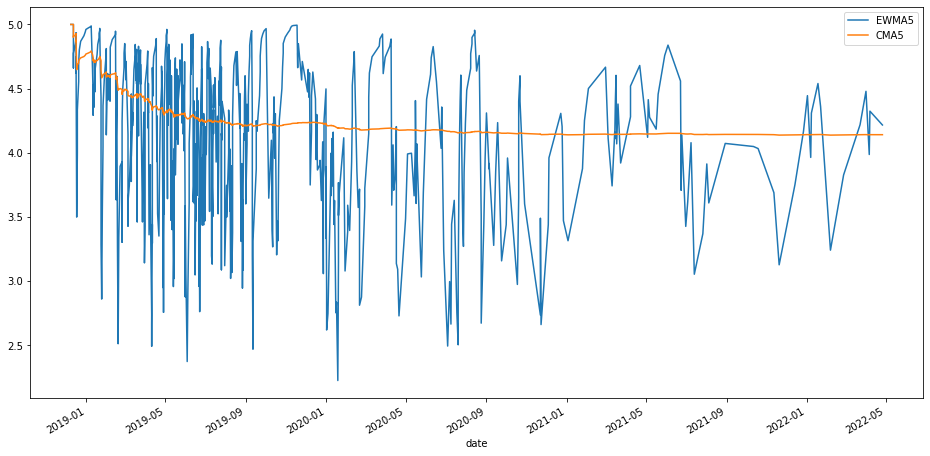

In [32]:
mva_df[['EWMA5','CMA5']].plot(label='Stars Over time', 
                                  figsize=(16, 8))

####Grouping data based on time interval.

*   Quarterly interval





In [33]:
mva_df.resample('Q').stars.median()

date
2018-12-31    5.0
2019-03-31    5.0
2019-06-30    5.0
2019-09-30    5.0
2019-12-31    5.0
2020-03-31    4.0
2020-06-30    5.0
2020-09-30    5.0
2020-12-31    5.0
2021-03-31    5.0
2021-06-30    5.0
2021-09-30    4.0
2021-12-31    4.0
2022-03-31    5.0
2022-06-30    4.5
Freq: Q-DEC, Name: stars, dtype: float64

In [34]:
mva_df.groupby([pd.Grouper(freq='Q'), 'stars']).agg(unique_items=('stars', 'sum'))


unique_items
date       stars              
2018-12-31 1                 1
           4                 8
           5                90
2019-03-31 1                 7
           2                 6
...                        ...
2022-03-31 4                 4
           5                25
2022-06-30 3                 3
           4                 4
           5                10

[65 rows x 1 columns]

# Applying NLP to review content

### Sentiment analysis

Get the general sentiment from review content and visualize it over the time.
Using huggingface transformers for sentiment analysis.

In [58]:
!pip install transformers
from transformers import pipeline

classifier = pipeline("sentiment-analysis") 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


No model was supplied, defaulted to t5-base (https://huggingface.co/t5-base)
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [116]:
def getSentiment(s):
  sentiment= classifier(s.content)
  label = sentiment[0].get('label')
  score = sentiment[0].get('score')
  #print(sentiment)
  if s.stars==5:
    s["sentiment_label"] = "POSITIVE"
    s["sentiment_score"] = 0.99
    return s
    
  s["sentiment_label"] = label

  s["sentiment_score"] = score if label=="POSITIVE" else 0
  return s
df=df.apply(getSentiment,axis=1)
#classifier(df.content.tolist())

In [117]:
sent_df = df.set_index('date')

sent_df = sent_df['sentiment_score'].to_frame()

#sent_df[['sentiment_score']].plot(label='Stars Over time', 
#                                  figsize=(16, 8))

In [120]:
sent_df['SMA5'] = sent_df['sentiment_score'].rolling('90D').mean()

sent_df['CMA5'] = sent_df['sentiment_score'].expanding().mean()

  
# removing all the NULL values using 
# dropna() method
sent_df.dropna(inplace=True)
  
# printing Dataframe
sent_df

,sentiment_score,SMA5,EWMA5,CMA5
date,,,,
2018-11-27,0.990000,0.990000,0.990000,0.990000
2018-12-06,0.990000,0.990000,0.990000,0.990000
2018-12-06,0.990000,0.990000,0.990000,0.990000
2018-12-07,0.990000,0.990000,0.990000,0.990000
2018-12-09,0.990000,0.990000,0.990000,0.990000
...,...,...,...,...
2022-03-23,0.990000,0.754634,0.787104,0.728423
2022-04-01,0.990000,0.754634,0.854736,0.728814
2022-04-06,0.000000,0.644634,0.569824,0.727725


DatetimeIndex(['2018-11-27', '2018-12-06', '2018-12-06', '2018-12-07',
               '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-11',
               '2018-12-13', '2018-12-13',
               ...
               '2022-01-08', '2022-01-18', '2022-01-22', '2022-02-06',
               '2022-02-26', '2022-03-23', '2022-04-01', '2022-04-06',
               '2022-04-07', '2022-04-26'],
              dtype='datetime64[ns]', name='date', length=671, freq=None)

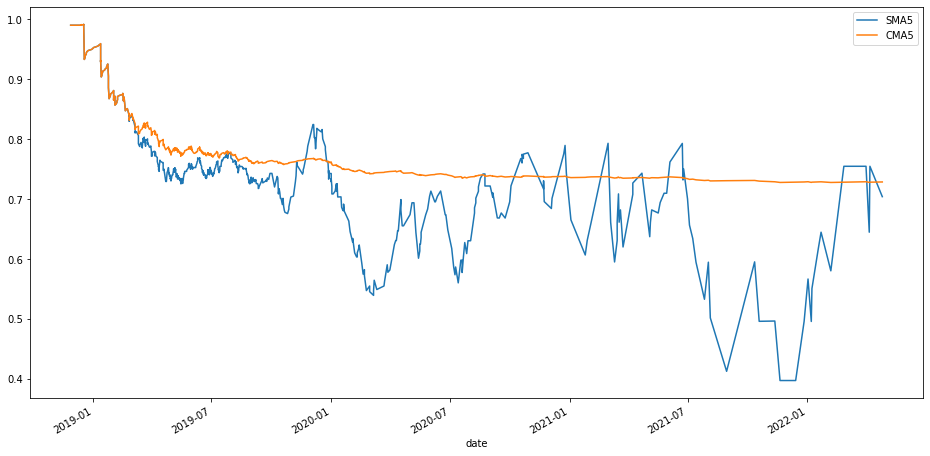

In [121]:
sent_df[['SMA5','CMA5']].plot(label='Stars Over time', 
                                  figsize=(16, 8))
sent_df.index

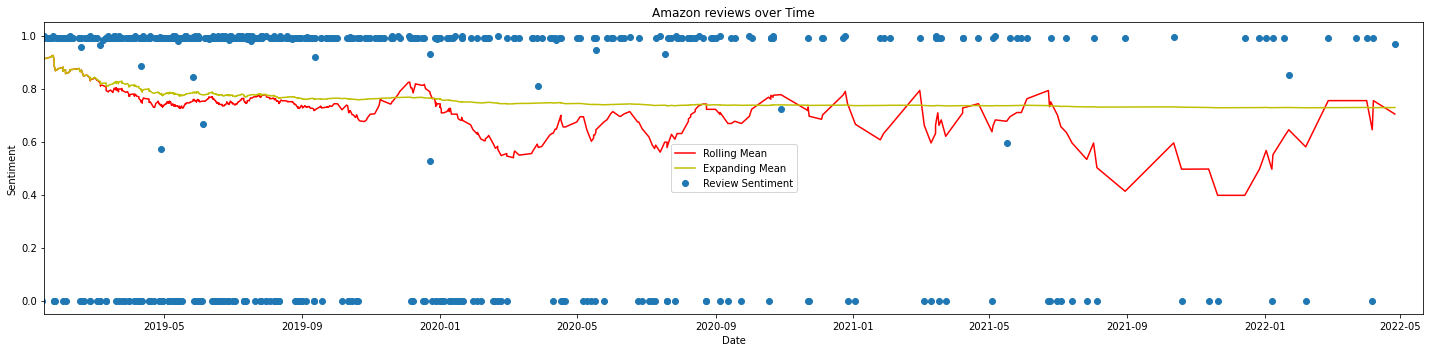

In [123]:

import matplotlib.pyplot as plt
import datetime as dt

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(sent_df.index,sent_df['sentiment_score'], label='Review Sentiment')
ax.plot(sent_df.index,sent_df['SMA5'], color ='r', label='Rolling Mean')
ax.plot(sent_df.index,sent_df['CMA5'], color='y', label='Expanding Mean')
ax.set_xlim([dt.date(2019,1,15),dt.date(2022,5,21)])
ax.set(title='Amazon reviews over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()

### Topic modeling

If we find diverse topics in the review contents then the current product reviews might be dubious

In [43]:
!pip install -U sentence-transformers
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 2.8 MB/s 
     |████████████████████████████████| 636 kB 43.1 MB/s 
     |████████████████████████████████| 88 kB 3.6 MB/s 
     |████████████████████████████████| 5.2 MB 39.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 48.7 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342167 sha256=35a7a44004cefd787f47af37f505793cd4a12a8a1d2ce729d04691c2cf3212f3
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7524cd6592d9afc40329935e

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##### clean data

In [39]:
stopwordSet = set(stopwords.words("english"))

lemma = WordNetLemmatizer()

def cleanup_sentences(sentence):
    text = re.sub('[^a-zA-Z0-9]'," ", sentence) #removing non alpha numeric
    text = text.lower() # convert to lower case.
    text = word_tokenize(text, language="english") # tokenize
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet] # Lemmatizing words and removing stopwords
    text = " ".join(text) 
    return text

In [40]:
df['content_cleaned'] = df['content'].apply(cleanup_sentences)

In [44]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

#sentence-transformers/all-roberta-large-v1: This is a sentence-transformers model: 
#It maps sentences & paragraphs to a 1024 dimensional dense vector space and can be used for tasks like clustering or semantic search.
sentence_model = SentenceTransformer("sentence-transformers/all-roberta-large-v1")
topic_model = BERTopic(embedding_model=sentence_model, calculate_probabilities = True, verbose = True, diversity = 0.2)

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/191 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.84k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/650 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/328 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

In [45]:
#train
docs = df['content_cleaned'].to_list()
topics, probabilities = topic_model.fit_transform(docs)

Batches:   0%|          | 0/21 [00:00<?, ?it/s]

2022-05-24 08:08:16,376 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-05-24 08:08:31,072 - BERTopic - Reduced dimensionality
2022-05-24 08:08:31,126 - BERTopic - Clustered reduced embeddings


In [48]:
topic_freq = topic_model.get_topic_info()
topic_freq.head(5)

,Topic,Count,Name
0,0,641,0_knee_brace_strap_product
1,1,18,1_dad_made_used_give
2,2,12,2_muy_se_buen_soporte


Majority belong to one topic and hence we could conclude that the reviews are geninue

In [50]:
topic_model.visualize_barchart()

In [53]:
for i in range(3):
    print(topic_model.get_topic(i))

[('knee', 0.09620810437971118), ('brace', 0.08106240174222112), ('strap', 0.04452652073085517), ('product', 0.036389397255827544), ('size', 0.030696913300922706), ('comfortable', 0.030605169400289522), ('velcro', 0.02426089160467453), ('need', 0.02381978448458954), ('sleeve', 0.020459577727114268), ('wear', 0.02010058625802918)]
[('dad', 0.1776579835346398), ('made', 0.12504349166764026), ('used', 0.11656077014571575), ('give', 0.11176618081800814), ('protectable', 0.10730012681308564), ('turrible', 0.10730012681308564), ('alone', 0.09806242902530528), ('rating', 0.09806242902530528), ('happy', 0.07960406332363142), ('came', 0.0780378779410633)]
[('muy', 0.3680793089469618), ('se', 0.2612617404921173), ('buen', 0.204398141558738), ('soporte', 0.14420945444897834), ('excelente', 0.14420945444897834), ('producto', 0.07889715206844532), ('tula', 0.07889715206844532), ('resultaron', 0.07889715206844532), ('recomiendo', 0.07889715206844532), ('perfecta', 0.07889715206844532)]
